In [8]:
import pylab as pl
import pandas as pd
import numpy as np
import json

#i know i will use scipy for the tests
import scipy.stats
import os

#setup environmental variable
if os.getenv ('PUIDATA') is None:
    os.environ['PUIDATA'] = '/Users/mac/Desktop/CUSP/PUI/PUIdata'
    
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUIDATA')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [21]:
if not os.path.isfile(os.getenv("PUIDATA") + "/" + "NYPD_Motor_Vehicle_Collisons.csv"):
    !curl -O 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv'
    os.rename('rows.csv', 'NYPD_Motor_Vehicle_Collisons.csv')
if os.system('mv NYPD_Motor_Vehicle_Collisons.csv ' + os.getenv('PUIDATA')):
            print ("Error moving file!, Please check!")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  165M    0  165M    0     0  1313k      0 --:--:--  0:02:09 --:--:-- 1595k


In [23]:
data = pd.read_csv(os.getenv ('PUIDATA')+'/NYPD_Motor_Vehicle_Collisons.csv')
data.head(5)

DATE   TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  09/18/2016  19:09     QUEENS   11422.0        NaN        NaN   
1  09/18/2016  19:09   BROOKLYN   11237.0        NaN        NaN   
2  09/18/2016   1:09  MANHATTAN   10012.0        NaN        NaN   
3  09/18/2016   1:09        NaN       NaN  40.862498 -73.934185   
4  09/18/2016  20:09   BROOKLYN   11229.0        NaN        NaN   

                    LOCATION   ON STREET NAME CROSS STREET NAME  \
0                        NaN              NaN               NaN   
1                        NaN              NaN               NaN   
2                        NaN  DELANCEY STREET            BOWERY   
3  (40.8624983, -73.9341848)              NaN               NaN   
4                        NaN         AVENUE W    PLUMB 1 STREET   

           OFF STREET NAME         ...          \
0     234-32    131 AVENUE         ...           
1  140       MORGAN AVENUE         ...           
2                      NaN         ...           
3                      NaN         ...           
4                      NaN         ...           

    CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                             NaN                            NaN   
1  Driver Inattention/Distraction                            NaN   
2                     Unspecified                            NaN   
3                     Unspecified                            NaN   
4                     Unspecified                    Unspecified   

   CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  UNIQUE KEY  \
0                            NaN                            NaN     3522011   
1                            NaN                            NaN     3522438   
2                            NaN                            NaN     3523763   
3                            NaN                            NaN     3524356   
4                            NaN                            NaN     3522651   

             VEHICLE TYPE CODE 1            VEHICLE TYPE CODE 2  \
0  SPORT UTILITY / STATION WAGON                            NaN   
1                           TAXI  SPORT UTILITY / STATION WAGON   
2                  PICK-UP TRUCK              PASSENGER VEHICLE   
3              PASSENGER VEHICLE  SPORT UTILITY / STATION WAGON   
4              PASSENGER VEHICLE  SPORT UTILITY / STATION WAGON   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                  NaN                 NaN                 NaN  
3                  NaN                 NaN                 NaN  
4                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [24]:
data.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [27]:
data = data[['DATE', 'TIME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]
data.head(5)

DATE   TIME  NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED
0  09/18/2016  19:09                          0                         0
1  09/18/2016  19:09                          2                         0
2  09/18/2016   1:09                          0                         0
3  09/18/2016   1:09                          0                         0
4  09/18/2016  20:09                          0                         0

In [30]:
data['TIME'] = pd.to_datetime(data['TIME'])

In [35]:
norm_injured

232321

In [38]:
error_injured

481.99688795675848

In [43]:
counts_injured = data['NUMBER OF PERSONS INJURED'].groupby([data['TIME'].dt.hour]).sum()
counts_killed = data['NUMBER OF PERSONS KILLED'].groupby([data['TIME'].dt.hour]).sum()

norm_injured = counts_injured.sum()
norm_killed = counts_killed.sum()

error_injured = np.sqrt(counts_injured)
error_killed = np.sqrt(counts_killed)


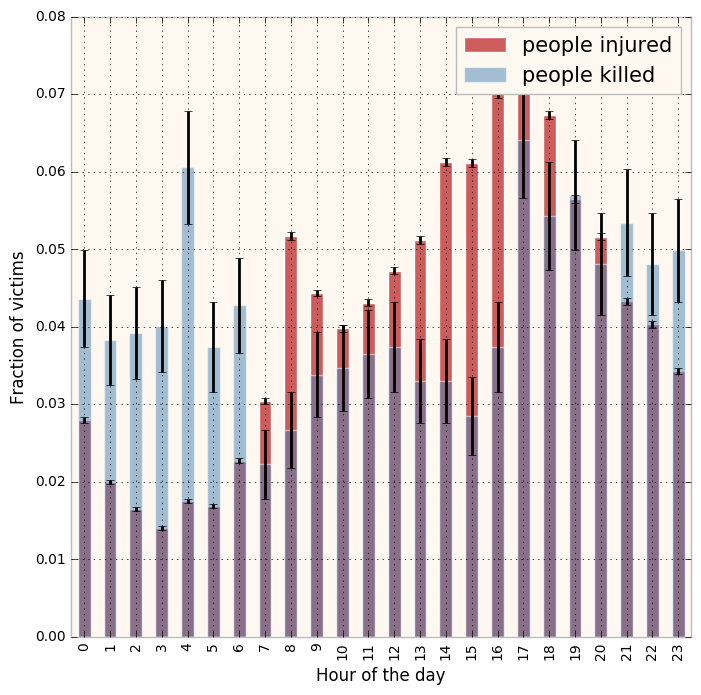

In [45]:
fig1 = pl.figure(figsize(8,8))
ax=((counts_injured) / norm_injured).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_injured) / norm_injured, (error_injured) / norm_injured)], label='people injured')
ax=((counts_killed) / norm_killed).plot(kind="bar",color='SteelBlue', alpha = 0.5,  yerr=[
           ((error_killed) / norm_killed, (error_killed) / norm_killed)], label='people killed')

ax.set_ylabel ("Fraction of victims")
ax.set_xlabel ("Hour of the day")
pl.legend(['people injured','people killed'],fontsize=15)

### Figure 1: Fraction of people get injured or killed in motor vehicle collisions by hour per day in 2016

The figure shows that the collisions are more likely to have serious consequence (people get killed) if they happen after 8pm and before 7am.